# Ejercicio 1

In [73]:
import ex_1.main as main
from perceptrons.multilayer_perceptron import MultiLayerPerceptron
from perceptrons.simple_step_perceptron import SimpleStepPerceptron
import numpy as np
import matplotlib.pyplot as plt

Declare paths

In [74]:
config_file_path = "ex_1/resources/config.json"
results_file_path = "ex_1/resources/perceptron_data.txt"

In [75]:
learning_rates_results = "ex_1/resources/learning_rates.txt"

Clear perceptron data file

In [76]:
open(results_file_path, "w").close()

W min[2.7 2.7 0.9]


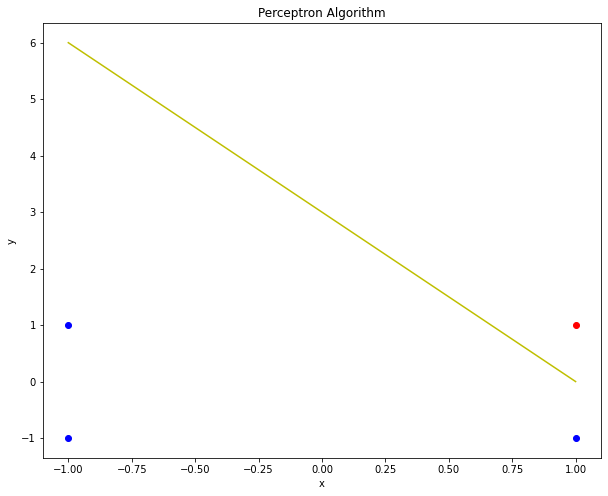

In [77]:
training_set, expected_output, learn_rate, epoch_limit, execution_count, random_weights = main.parse_config(config_file_path)
p = SimpleStepPerceptron(expected_output, training_set, learn_rate)
w_min, error_min, i = p.learn(epoch_limit*len(training_set), lambda i, error, weights: open(results_file_path, "a").write("{}\t{}\t{}\n".format(i, error, weights)), random_weights=random_weights)
main.plot_decision_boundary(training_set, w_min, expected_output)

Text(0, 0.5, 'Error')

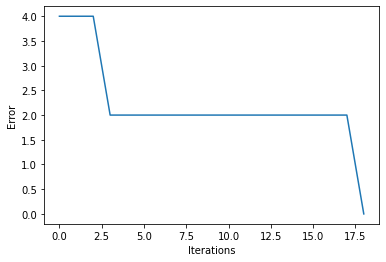

In [78]:
iterations, errors = main.iteration_vs_error(results_file_path)
plt.plot(iterations, errors)
plt.xlabel("Iterations")
plt.ylabel("Error")

Genero el output para después promediarlo

In [79]:
multiple_results_path = f"ex_1/resources/multiple_results_{learn_rate}.txt"
open(multiple_results_path, "w").close()

In [80]:
p = SimpleStepPerceptron(expected_output, training_set, learn_rate)

for i in range(execution_count):
    w_min, e_min, i = p.learn(epoch_limit*len(training_set), lambda i, error, weights: open(results_file_path, "a").write("{},{}\n".format(i, error)), random_weights=random_weights)
    open(multiple_results_path, "a").write("{},{}\n".format(i, e_min))

W min[2.7 2.7 0.9]
W min[0.9 0.9 0.9]
W min[2.7 2.7 0.9]
W min[0.9 2.7 2.7]
W min[0.9 0.9 0.9]
W min[2.7 2.7 0.9]
W min[0.9 0.9 0.9]
W min[2.7 0.9 2.7]
W min[2.7 2.7 0.9]
W min[0.9 0.9 0.9]
W min[0.9 2.7 2.7]
W min[0.9 0.9 0.9]
W min[2.7 2.7 0.9]
W min[0.9 0.9 0.9]
W min[0.9 0.9 0.9]
W min[2.7 2.7 0.9]
W min[2.7 0.9 2.7]
W min[2.7 0.9 2.7]
W min[2.7 2.7 0.9]
W min[0.9 2.7 2.7]


In [81]:
i_avg, i_std, e_avg, e_std = main.parse_results_for_rate(multiple_results_path)
open(learning_rates_results, "a").write("{},{},{},{},{}\n".format(learn_rate, i_avg, i_std, e_avg, e_std))

35